In [15]:
# Imports
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [10]:
# add csv and create df
df = pd.read_csv('reddit_vm.csv')
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


In [11]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1597 non-null   object 
 1   score      1597 non-null   int64  
 2   id         1597 non-null   object 
 3   url        467 non-null    object 
 4   comms_num  1597 non-null   int64  
 5   created    1597 non-null   float64
 6   body       1223 non-null   object 
 7   timestamp  1597 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 99.9+ KB


In [12]:
# check nulls
df.isna().sum()

title           0
score           0
id              0
url          1130
comms_num       0
created         0
body          374
timestamp       0
dtype: int64

In [13]:
# remove nulls in body
df = df.dropna(subset=['body'])
df.isna().sum()

title           0
score           0
id              0
url          1130
comms_num       0
created         0
body            0
timestamp       0
dtype: int64

In [14]:
# Visualize Impact Scores
fig = px.histogram(df, x="score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Impact Score')
fig.show()

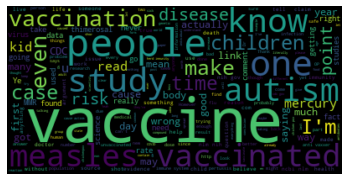

In [35]:
# Create a wordcloud for body
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Create stopword list:
stopwords = set(stopwords.words('english'))
new_stopwords = ['like','https','WWW','also','could','still','thing','say','see','said','well','want','would','think','get']
stopwords.update(new_stopwords)

# remove stop words from body
text = " ".join(review for review in df.body)

# graph wordcloud
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [36]:
# overview of scores before bucketing
df['score'].describe()

count    1223.000000
mean        1.881439
std         3.044650
min       -11.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        36.000000
Name: score, dtype: float64

In [47]:
# bucket scores by impact- using above mean for higher impact and below mean for lower impact
df['impact'] = df['score'].apply(lambda rating : +1 if rating >2 else -1)
df.drop('sentiment', axis=1, inplace=True)
df.head()

,title,score,id,url,comms_num,created,body,timestamp,impact
6,Comment,1,ej9x066,NaN,0,1.553474e+09,Your OP. It's not a myth. Only one vaccine con...,2019-03-25 02:34:53,-1
7,Fuck you anti-vaxxing retards,10,g6jkhp,https://www.reddit.com/r/VaccineMyths/comments...,8,1.587663e+09,https://youtu.be/zBkVCpbNnkU,2020-04-23 20:23:42,1
8,Comment,0,fofa0yy,NaN,0,1.587760e+09,Because Anti-Vaxxers have no sense,2020-04-24 23:19:50,-1
9,Comment,0,ej9xuaf,NaN,0,1.553475e+09,"What do you mean by ""your OP"". I am fairly new...",2019-03-25 02:45:21,-1
10,Comment,1,ej9x2qr,NaN,0,1.553474e+09,"When they say there's no thimerasol, they mean...",2019-03-25 02:35:47,-1


In [49]:
# split positive and negative impacts
higher_impact = df[df['impact'] == 1]
lower_impact = df[df['impact'] == -1]

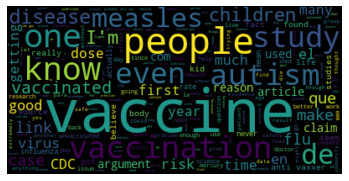

In [54]:
# plot wordcloud for high impact
hp_wc_set = " ".join(impact for impact in higher_impact.body)
higher_impact_wordcloud = WordCloud(stopwords=stopwords).generate(hp_wc_set)

plt.imshow(higher_impact_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('higher_impact_wordcloud.png')
plt.show()

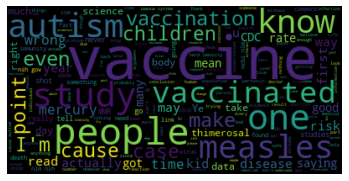

In [55]:
# plot wordcloud of lower impact
lp_wc_set = " ".join(impact for impact in lower_impact.body)
lower_impact_wordcloud = WordCloud(stopwords=stopwords).generate(lp_wc_set)

plt.imshow(lower_impact_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('lower_impact_wordcloud.png')
plt.show()